# Explorar visual y estadísticamente el dataset limpio para descubrir patrones, tendencias, relaciones y generar hipótesis.

**Autor:** Juan Manuel Martínez Estrada  
**Fecha:** 2025-06-05  
**Versión:** 1.0  

---

# 1. Configuración del Entorno y Rutas

---

* Importación de Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* Importación de Librerías Personalizadas

In [2]:
import sys
import os
sys.path.append(os.path.abspath('..'))
import src.data_loader as dl

* Configuración Global

In [3]:
# Configración de Pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:,.2f}'.format)
pd.set_option('display.max_rows', 50)

# Configuración de Matplotlib
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

# Configuación de NumPy
np.set_printoptions(precision=2, suppress=True)

* Rutas

In [4]:
data_path = os.path.join('..', 'data', 'processed', 'dataset_processed.csv') 

* Cargando el dataset en un DataFrame de pandas

In [5]:
df = dl.cargar_datos(data_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3060 entries, 0 to 3059
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   datetime                            3060 non-null   object 
 1   Sector                              3060 non-null   object 
 2   Hydroelectric Power                 3060 non-null   float64
 3   Geothermal Energy                   3060 non-null   float64
 4   Solar Energy                        3060 non-null   float64
 5   Wind Energy                         3060 non-null   float64
 6   Wood Energy                         3060 non-null   float64
 7   Waste Energy                        3060 non-null   float64
 8   Fuel Ethanol, Excluding Denaturant  3060 non-null   float64
 9   Biomass Losses and Co-products      3060 non-null   float64
 10  Biomass Energy                      3060 non-null   float64
 11  Total Renewable Energy              3060 no

* Definiendo las columnas de interes

In [6]:
consumption_columns = [
    'Hydroelectric Power', 'Geothermal Energy', 'Solar Energy',
    'Wind Energy', 'Wood Energy', 'Waste Energy',
    'Fuel Ethanol, Excluding Denaturant', 'Biomass Losses and Co-products',
    'Biomass Energy', 'Renewable Diesel Fuel',
    'Other Biofuels', 'Conventional Hydroelectric Power', 'Biodiesel' 
]

# 2. Análisis Global de Consumo

* Gráfico de la producción total de energías renovables

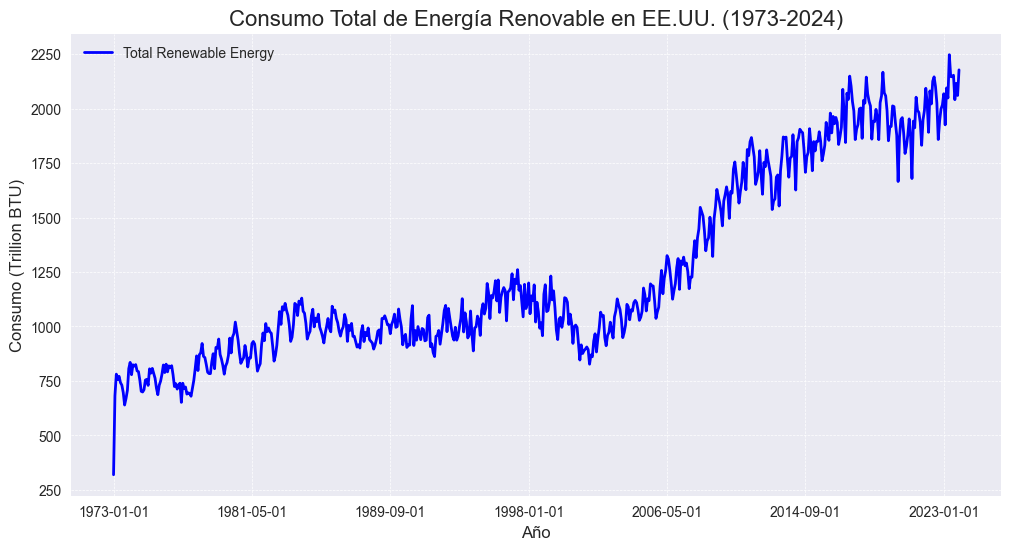

In [7]:
df_total_renewable = df.copy()
df_total_renewable = df_total_renewable.groupby(['datetime'])
df_total_renewable = df_total_renewable['Total Renewable Energy'].sum()

# Se gráfica el total de energía renovable consumida por todos los sectores.
df_total_renewable.plot(kind='line', linewidth=2, color='blue')
plt.title('Consumo Total de Energía Renovable en EE.UU. (1973-2024)', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Consumo (Trillion BTU)', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title='', fontsize=10)
plt.show()

# 3. Análisis por Fuente de Energía

* Tendencias Individuales por Fuente

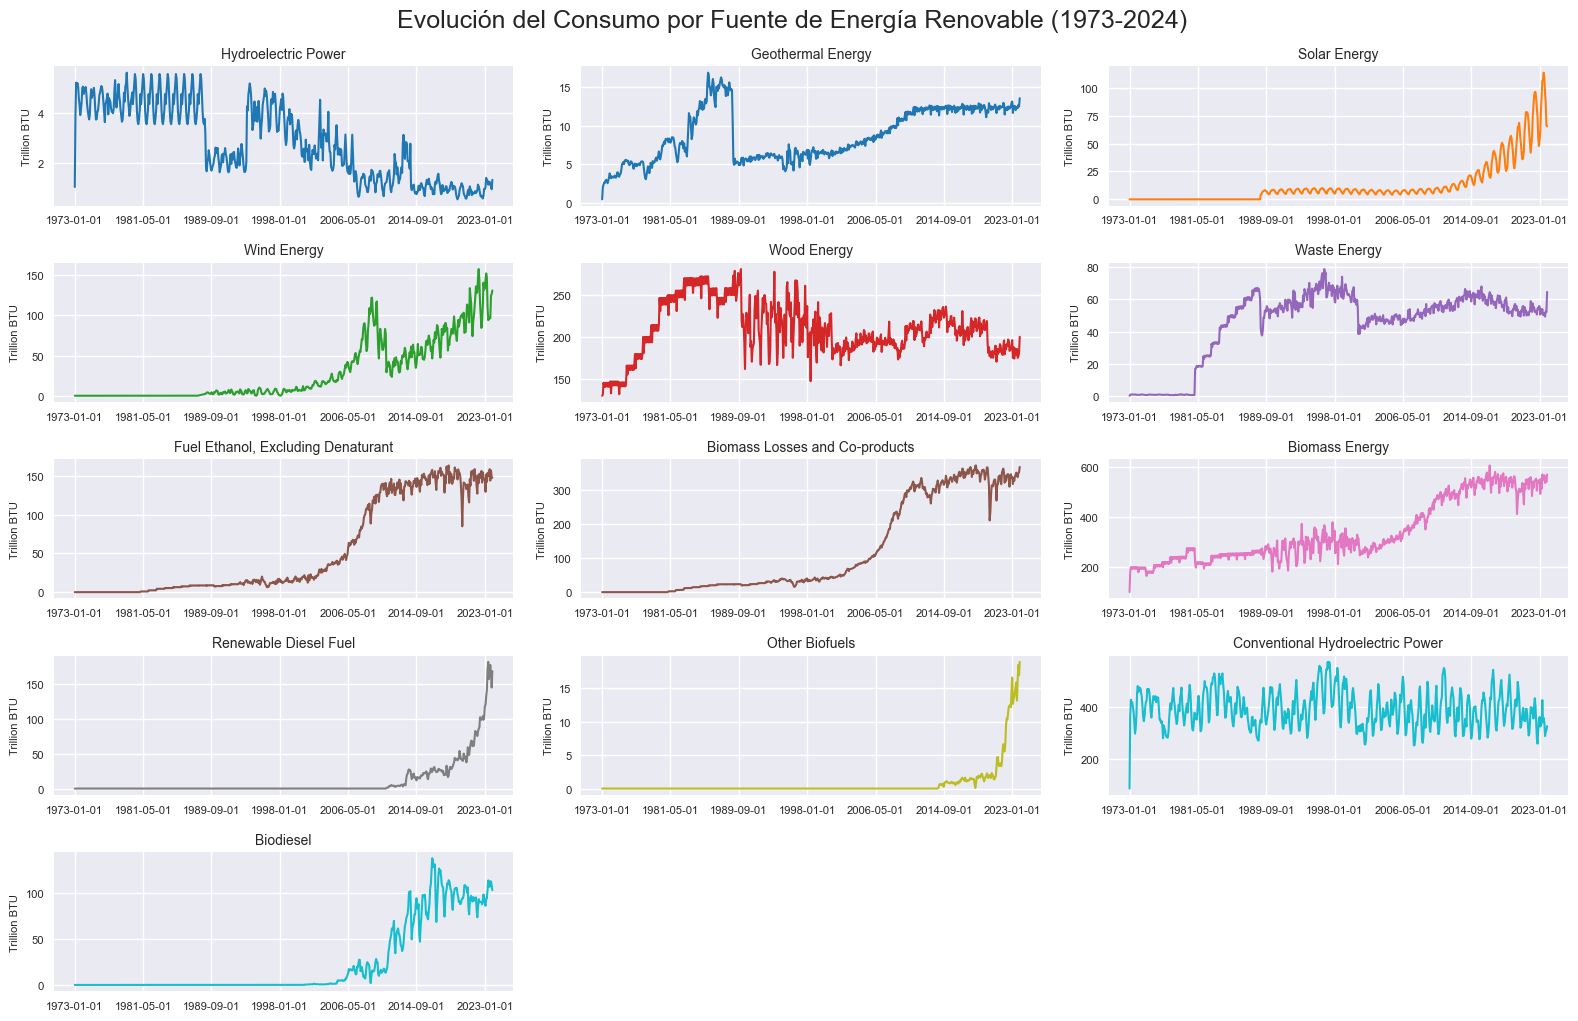

In [8]:
df_consumption = df.copy()
df_consumption = df_consumption.groupby(['datetime'])
df_consumption = df_consumption[consumption_columns].sum()

# Gráfica de cada fuente de energía a lo largo del tiempo
plt.figure(figsize=(16, 10))
for i, col in enumerate(consumption_columns):
    df_consumption_2 = df_consumption.groupby(['datetime']).agg({col: 'sum'})
    plt.subplot( (len(consumption_columns) + 2) // 3 , 3, i + 1) # Ajusta el layout de subplots
    colores = plt.cm.tab10(np.linspace(0, 1, 13))
    df_consumption_2[col].plot(linewidth=1.5, color=colores[i % len(colores)])
    plt.title(col, fontsize=10)
    plt.xlabel('')
    plt.ylabel('Trillion BTU', fontsize=8)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

plt.tight_layout() # Ajusta el espaciado entre subplots
plt.suptitle('Evolución del Consumo por Fuente de Energía Renovable (1973-2024)', fontsize=18, y=1.02)
plt.show()

* Distribucion de los datos por fuente

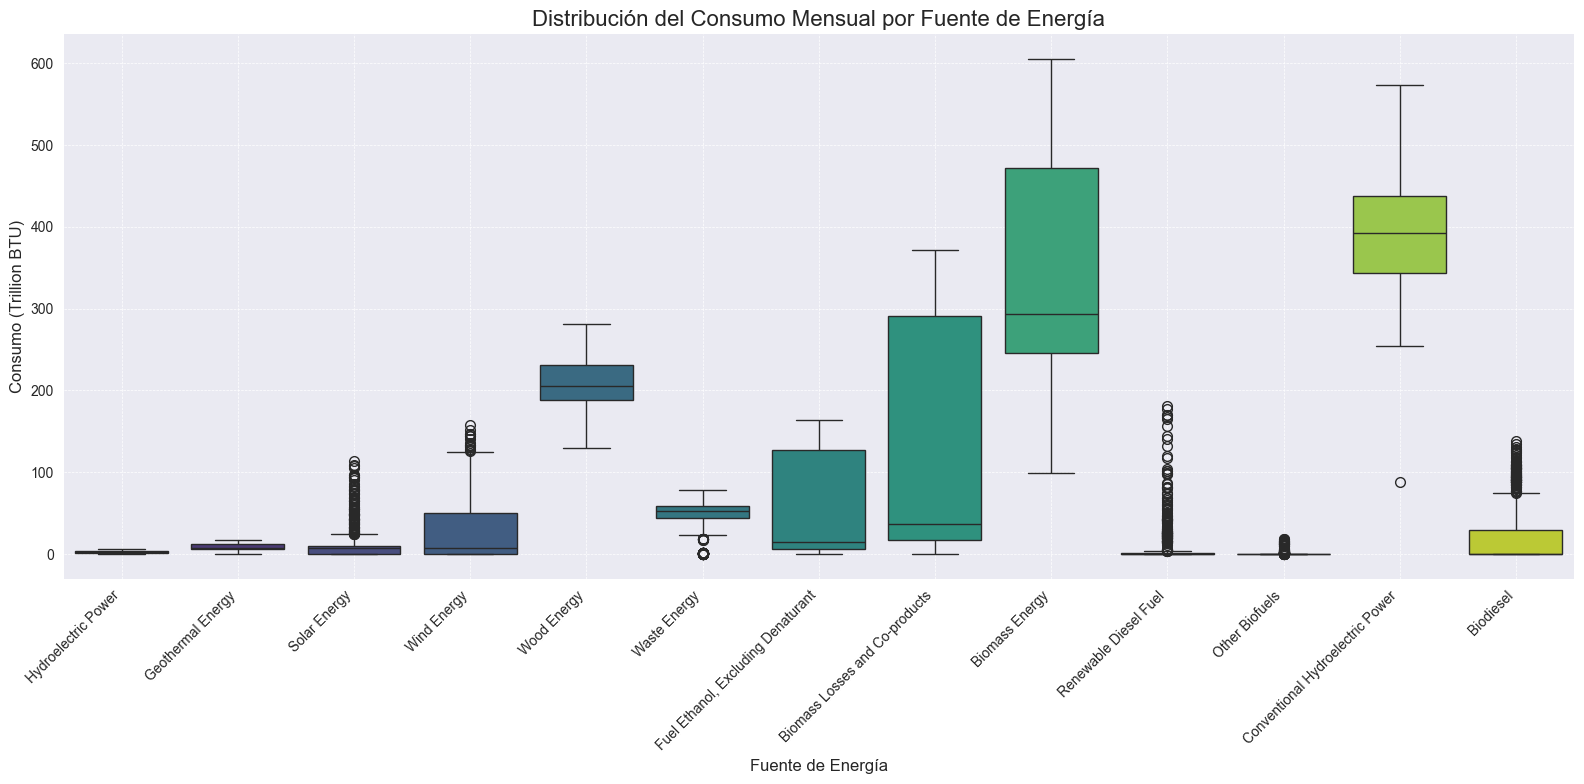

In [9]:
df_fuentes = df_consumption[consumption_columns].melt(var_name='Fuente de Energía', value_name='Consumo (Trillion BTU)')

plt.figure(figsize=(16, 8))

ax = sns.boxplot(
    x='Fuente de Energía',
    y='Consumo (Trillion BTU)',
    hue='Fuente de Energía',
    data=df_fuentes,
    palette='viridis',
    dodge=False          # agrupa los boxes en vez de separarlos por hue
)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.title('Distribución del Consumo Mensual por Fuente de Energía', fontsize=16)
plt.xlabel('Fuente de Energía', fontsize=12)
plt.ylabel('Consumo (Trillion BTU)', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

* Composición del Mix Energético a lo Largo del Tiempo

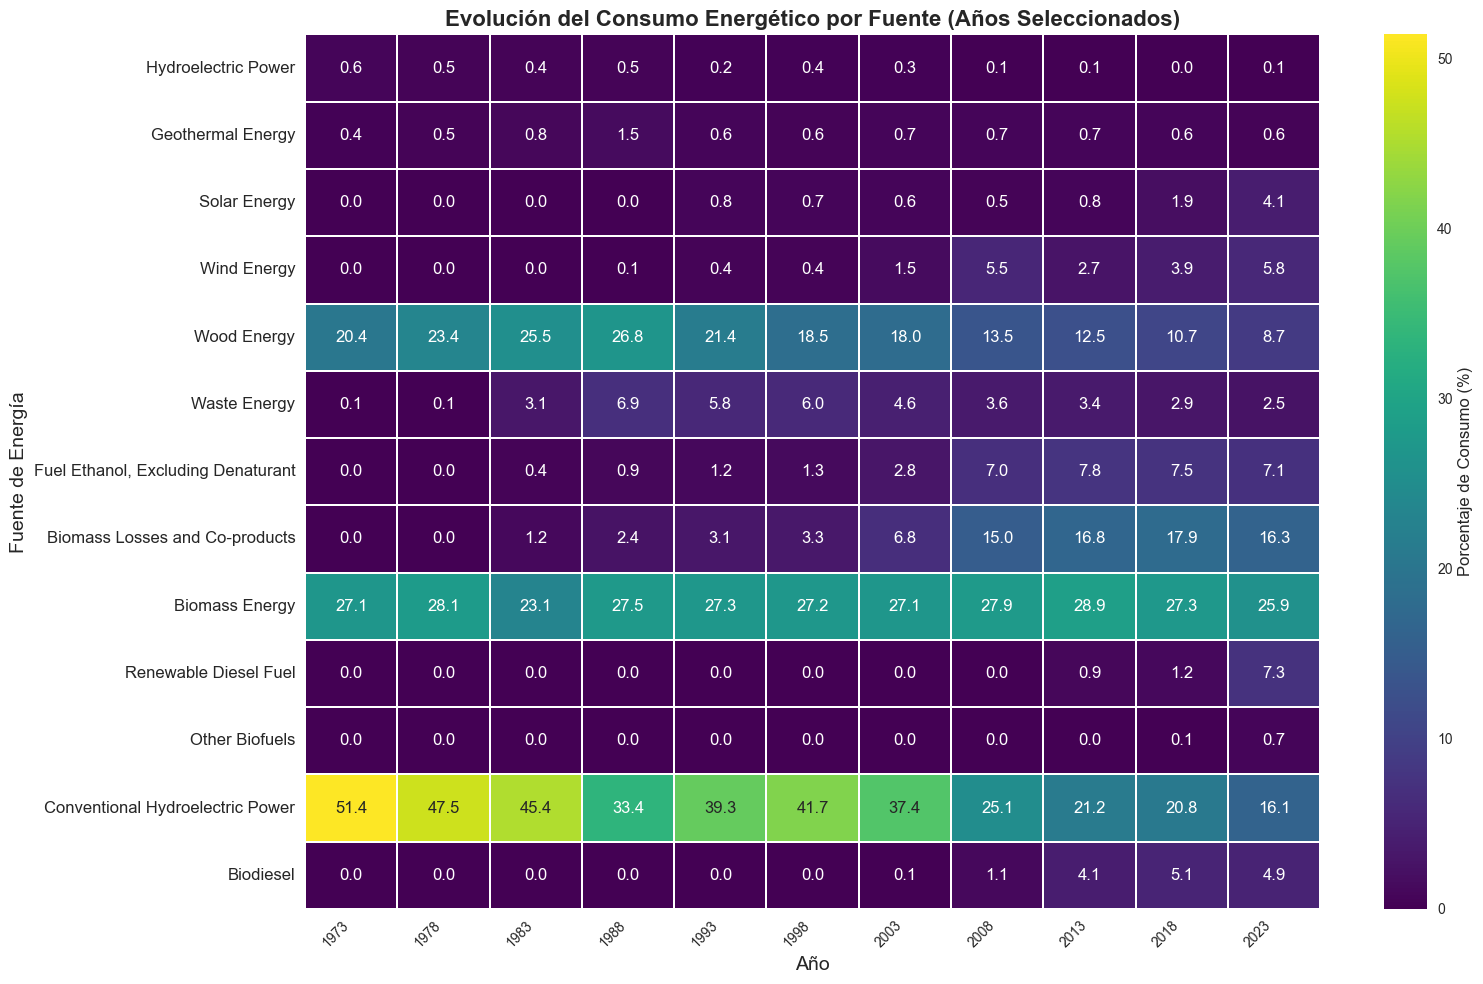

In [10]:
df['datetime'] = pd.to_datetime(df['datetime'])
dl.mix_heatmap(df, consumption_columns)

* Consumo Total de Energía para cada Sector en EU entre 1973 - 2024

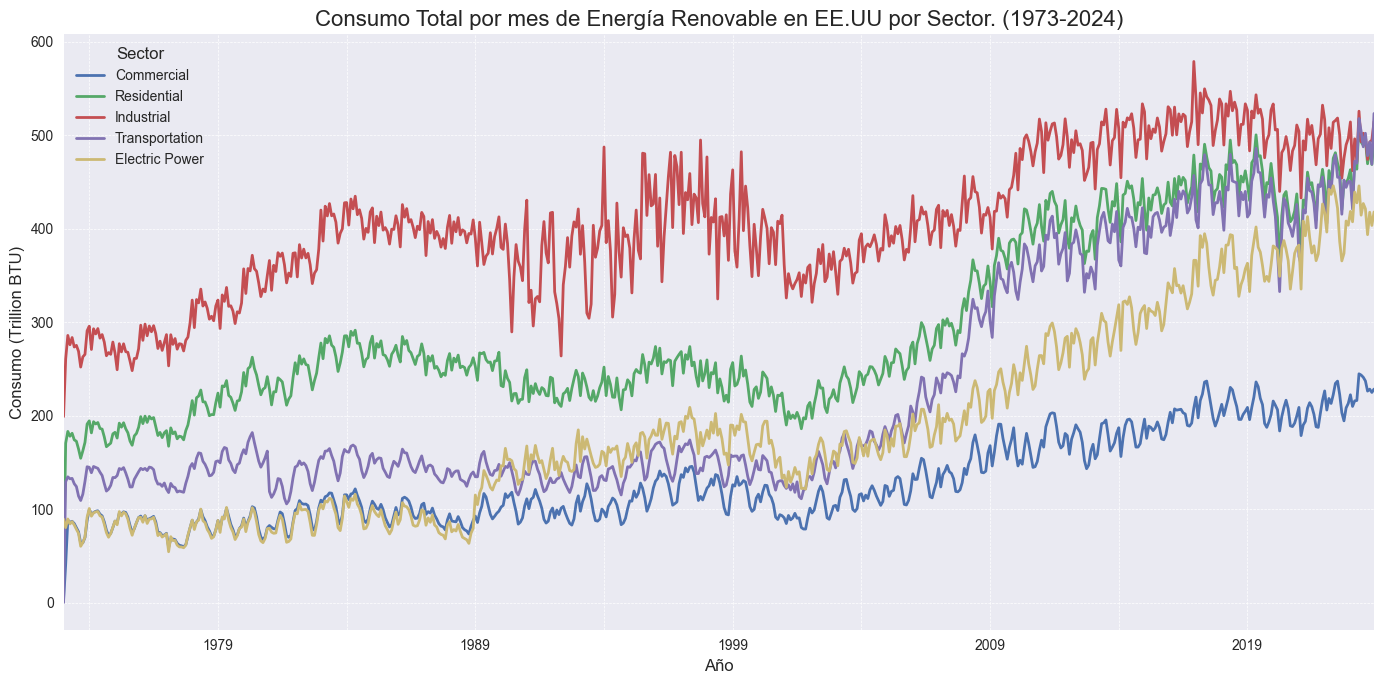

In [11]:
dl.plot_sector_consumo(df, consumption_columns)

DataFrame procesado:
Sector  Commercial  Electric Power  Industrial  Residential  Transportation
year                                                                       
1973        829.31          951.92    3,193.10     1,933.18        1,395.02
1974      1,064.41        1,051.59    3,363.75     2,189.01        1,620.47
1975      1,061.32        1,049.42    3,174.58     2,185.81        1,626.27
1976      1,015.36          996.85    3,429.30     2,283.83        1,640.39
1977        795.70          785.14    3,342.42     2,182.31        1,495.99
...            ...             ...         ...          ...             ...
2019      2,503.95        4,367.94    6,162.43     5,535.26        5,320.36
2020      2,417.52        4,439.36    5,880.70     5,036.21        4,835.66
2021      2,398.76        4,638.16    5,932.53     5,188.01        5,077.46
2022      2,599.23        4,932.67    5,940.78     5,428.82        5,334.58
2023      2,738.24        5,032.86    5,939.09     5,730.85        

<Figure size 1600x1000 with 0 Axes>

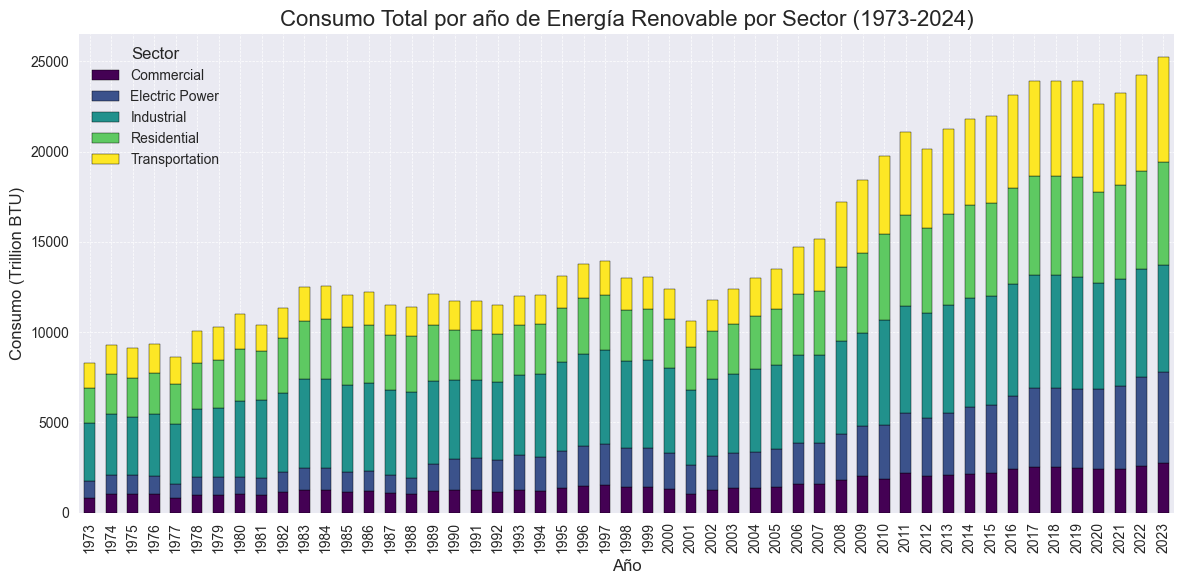

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [12]:
dl.bar_sector_consumo(df, consumption_columns)